In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

import divergence

In [2]:
time_average = np.arange(0, 3100, 100)
divergence_dict = divergence.make_divergence_dict(time_average)

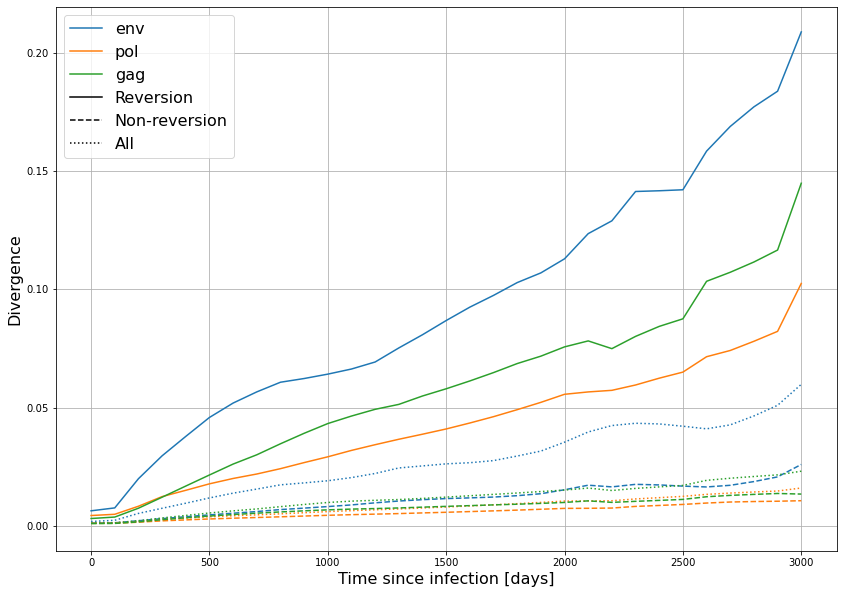

In [3]:
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
fontsize = 16

plt.figure(figsize=(14, 10))
for ii, region in enumerate(["env","pol","gag"]):
    plt.plot(time_average, divergence_dict[region]["all"]["rev"], '-', color=colors[ii], label=region)
    plt.plot(time_average, divergence_dict[region]["all"]["non_rev"], '--', color=colors[ii])
    plt.plot(time_average, divergence_dict[region]["all"]["all"], ':', color=colors[ii])
plt.plot([0], [0], 'k-', label="Reversion")
plt.plot([0], [0], 'k--', label="Non-reversion")
plt.plot([0], [0], 'k:', label="All")
plt.grid()
plt.xlabel("Time since infection [days]", fontsize=fontsize)
plt.ylabel("Divergence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

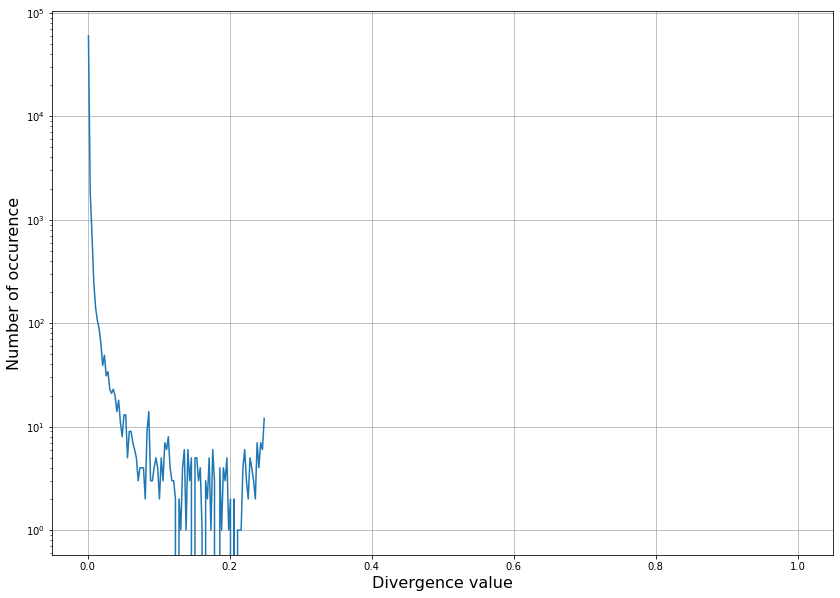

In [16]:
# first timepoints
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
all_div_vector = np.array([])
for ii, region in enumerate(["env", "pol", "gag"]):
    for patient_name in patient_names:
        all_div_vector = np.concatenate(
            (all_div_vector, divergence_dict[region][patient_name]["div_matrix"][0, :].flatten()))

hist, bins = np.histogram(all_div_vector, bins=100)
bins = 0.5*(bins[:-1] + bins[1:])

plt.figure(figsize=(14,10))
plt.plot(bins, hist)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Number of occurence", fontsize=16)
plt.yscale("log")
plt.xlim([-0.05,1.05])
plt.show()

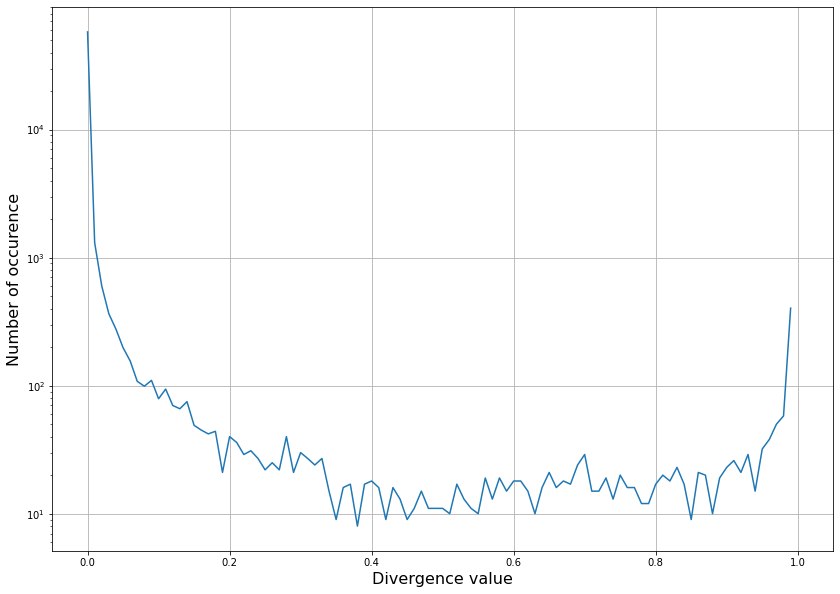

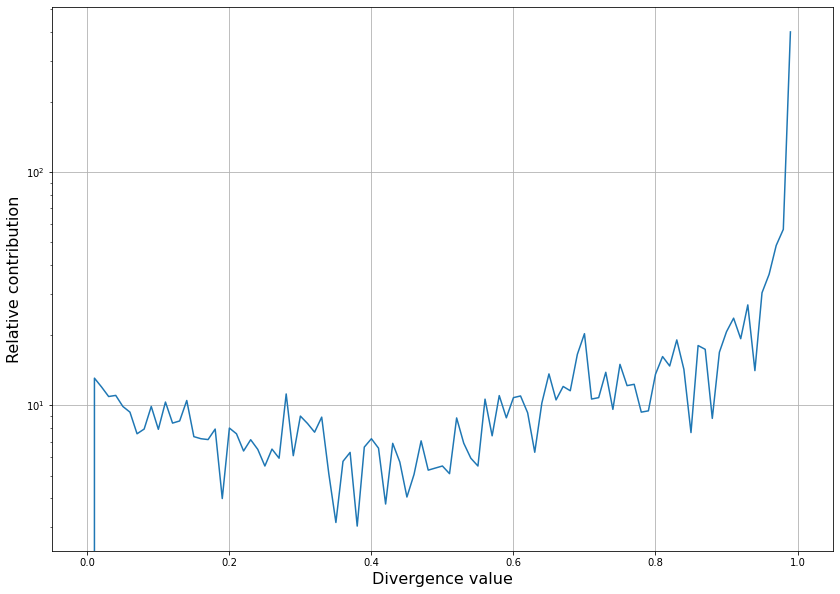

In [19]:
# last timepoints
all_div_vector = np.array([])
for ii, region in enumerate(["env", "pol", "gag"]):
    for patient_name in patient_names:
        all_div_vector = np.concatenate(
            (all_div_vector, divergence_dict[region][patient_name]["div_matrix"][-1, :].flatten()))

hist, bins = np.histogram(all_div_vector, bins=100)
bins = bins[:-1]

plt.figure(figsize=(14,10))
plt.plot(bins, hist)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Number of occurence", fontsize=16)
plt.yscale("log")
plt.xlim([-0.05,1.05])


plt.figure(figsize=(14,10))
plt.plot(bins, hist*bins)
plt.grid()
plt.xlabel("Divergence value", fontsize=16)
plt.ylabel("Relative contribution", fontsize=16)
plt.yscale("log")
plt.xlim([-0.05,1.05])
plt.show()